# Random Forest on Titanic Dataset

### Importing libraries and dataset

In [401]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# For splitting dataset
from sklearn.model_selection import train_test_split, GridSearchCV

# For tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostRegressor

# Evaluation tools
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import make_classification

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [402]:
# Importing dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [403]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [404]:
# Dropping columns that don't help with predicting passenger survival
titanic_df.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [405]:
# Dealing with null values
titanic_df["Age"].fillna((titanic_df["Age"].mean()), inplace=True)

C:\Users\amylo\AppData\Local\Temp\ipykernel_28852\2377218018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Age"].fillna((titanic_df["Age"].mean()), inplace=True)


One-hot encoding

In [406]:
# One-hot encoding to change categorical data into numerical data
# One-hot encoding 'Sex' column
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])

In [407]:
# One-hot encoding 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


### Selecting variables

Splitting into train, development, test

In [408]:
# Selecting x and y variables
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

# Creating variable for random state value
r = 42

# Split original dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=r)

# Split training set further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=r)

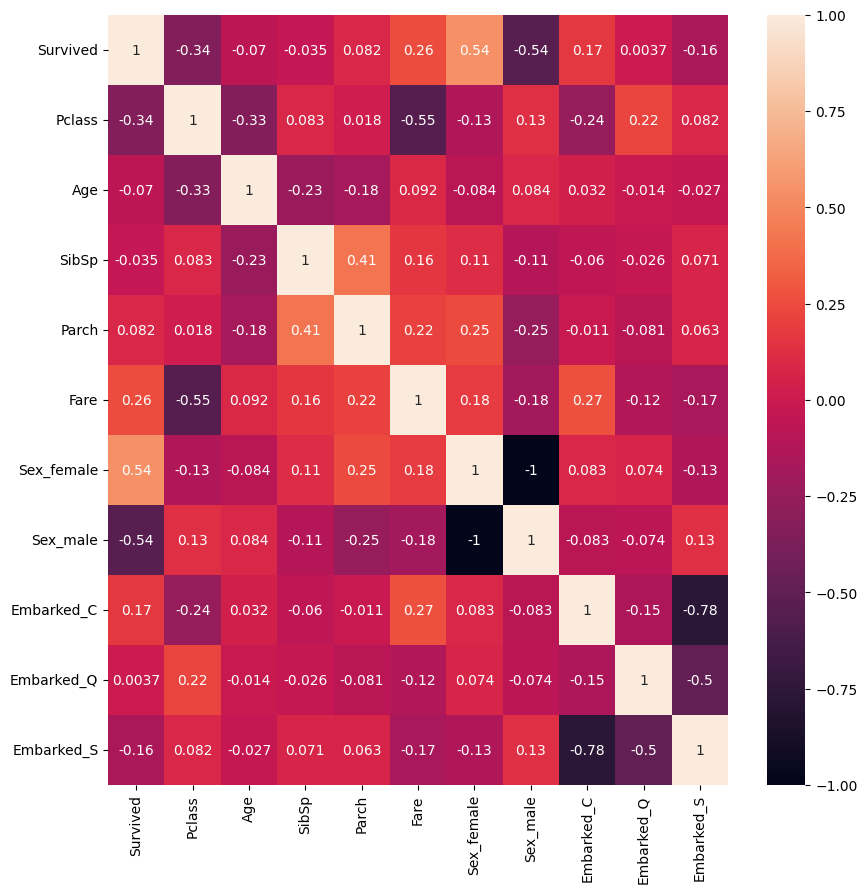

In [409]:
# Plotting heatmap to see correlations
plt.figure(figsize=(10, 10))
sns.heatmap(titanic_df.corr(), annot=True)
plt.show()

### Base model

In [421]:
# Create base model
base = DecisionTreeClassifier(max_depth=None, random_state=r)
ensemble = BaggingClassifier(estimator=base, random_state=r)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.7430167597765364
Accuracy ensemble: 0.7821229050279329


### Hyperparameter Tuning

In [422]:
# Hyperparameter tuning for Random Forest using GridSearchCV
rf = RandomForestClassifier(random_state=r)

params = {
    'max_depth': [2,3,5,10,20],
    'n_estimators': [10,25,30,50,100,200],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [423]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, random_state=42)

In [424]:
print(grid_search.best_params_)
best_estimators=grid_search.best_params_['n_estimators']

{'max_depth': 10, 'n_estimators': 100}


### Feature importance

In [425]:
titanic_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
5,0,3,29.699118,0,0,8.4583,False,True,False,True,False
6,0,1,54.000000,0,0,51.8625,False,True,False,False,True
7,0,3,2.000000,3,1,21.0750,False,True,False,False,True
8,1,3,27.000000,0,2,11.1333,True,False,False,False,True
9,1,2,14.000000,1,0,30.0708,True,False,True,False,False


In [431]:
forest = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=r)
forest.fit(X_train, y_train)

# Get numerical feature importances
feature_names = X.columns
importances = forest.feature_importances_

# Dataframe with features and importances
# Sort the feature importances by most important first
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

feature_imp_df

,Feature,Importance
1,Fare,0.285554
0,Age,0.258355
2,Sex_female,0.186467
3,Sex_male,0.158868
4,Pclass,0.110755


From this it appears that **Fare, Age, Sex_female, Sex_male and Pclass** are the most important features for predicting 'Survived'.

*'Age' and 'Fare' are most important*

SibSp, Parch, Embarked_C, Embarked_Q and Embarked_S are all not as useful for prediciting 'Survived'.

In [432]:
# Select important features found above
X = titanic_df[['Age', 'Fare', 'Sex_female', 'Sex_male', 'Pclass']]

# Retrain model with newly selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r)
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.7430167597765364
Accuracy ensemble: 0.7821229050279329


### Comparing models

In [429]:
r = 42
base = DecisionTreeClassifier(max_depth=None,random_state=r)
ensemble = BaggingClassifier(estimator=base, random_state=r)
rf = RandomForestClassifier(random_state=r)
rf_hp = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=r)

# Train the classifiers
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
rf.fit(X_train,y_train)
rf_hp.fit(X_train,y_train)

# Predict the response for test dataset for the models
y_test_pred_base = base.predict(X_test)
y_test_pred_ensemble = ensemble.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_rf_hp = rf_hp.predict(X_test)

# Printing accuracies
print(f'Testing Accuracy for base Decision Tree model: {accuracy_score(y_test, y_test_pred_base)}')
print(f'Testing Accuracy for ensemble Bagging model: {accuracy_score(y_test, y_test_pred_ensemble)}')
print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Random Forest model with hyperparameters: {accuracy_score(y_test, y_test_pred_rf_hp)}')

Testing Accuracy for base Decision Tree model: 0.7430167597765364
Testing Accuracy for ensemble Bagging model: 0.7821229050279329
Testing Accuracy for Random Forest model: 0.7932960893854749
Testing Accuracy for Random Forest model with hyperparameters: 0.8268156424581006


### **Final model with most optimal hyperparameters**

In [430]:
# Instantiate final model with hyperparameters from GridSearchCV
final_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=r)

# Train model
final_model.fit(X_train, y_train)

# Predictions
y_pred = final_model.predict(X_test)

print(f'Testing Accuracy for full Random Forest model: {accuracy_score(y_test, y_pred)}')

Testing Accuracy for full Random Forest model: 0.8268156424581006
